In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os


In [79]:
# Import training data & testing data
cwd = os.getcwd()
train_data_import = pd.read_csv(cwd + "./banking_train.csv", sep=";")
test_data_import = pd.read_csv(cwd + "./banking_test.csv", sep=";")

# Create copies of the original data to manipulate
train_data = train_data_import.copy()
test_data = test_data_import.copy()

## Project Ideas:
### Sections(Campaign):
1. EDA - (Crosstabs, Visualizations, )
2. Modeling - ()
* Explore the data to identify which customers are most likely to default 
* Explore the data to identify which customers are most likely to take out loans
* PCA Analysis to reduce noise within the data.
* Cluster Analysis???


In [80]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Exploratory Data Analysis
* Explore missing values
* Descriptive Statistics
* Remove predictor variables with weak predictive power
* Examine the Dataframe
* Visualize & Eliminate Outliers
* Visualize the Distribution of Independent Variables vs Dependent Variables

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [82]:
# Descriptive statistics for the training data
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Numeric Variable Analysis

### Age
* Young_Adult: < 25
* Adult: 26 - 55
* Senior_Adult: > 55

In [83]:
train_data['age'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
1%          23.000000
5%          27.000000
10%         29.000000
25%         33.000000
50%         39.000000
75%         48.000000
90%         56.000000
95%         59.000000
99%         71.000000
max         95.000000
Name: age, dtype: float64

In [84]:
def age_conv(age):
    if age <= 25:
        return 'Young_Adult'
    elif age <= 55:
        return 'Adult'
    else:
        return 'Senior_Adult'

train_data['age_cat'] = train_data['age'].apply(age_conv)

test_data['age_cat'] = train_data['age'].apply(age_conv)

print('Age Category Frequency Counts')
display(train_data['age_cat'].value_counts())
print('Age Category vs Loan')
display(pd.crosstab(train_data['age_cat'], train_data['loan'], normalize='index'))

Age Category Frequency Counts


Adult           38975
Senior_Adult     4900
Young_Adult      1336
Name: age_cat, dtype: int64

Age Category vs Loan


loan,no,yes
age_cat,,
Adult,0.834920,0.165080
Senior_Adult,0.871224,0.128776
Young_Adult,0.866018,0.133982


### Balance: balance_cat
* Negative: < 0
* Positive: >= 0

In [85]:
train_data['balance'].describe(percentiles=[.01, .05,.1,.25,.5,.75,.9,.95,.99])

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
1%         -627.000000
5%         -172.000000
10%           0.000000
25%          72.000000
50%         448.000000
75%        1428.000000
90%        3574.000000
95%        5768.000000
99%       13164.900000
max      102127.000000
Name: balance, dtype: float64

In [86]:
train_data['balance_cat'] = train_data['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')

test_data['balance_cat'] = test_data['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive')


display(train_data['balance_cat'].value_counts())

display(pd.crosstab(train_data['balance_cat'], train_data['loan'], normalize='index'))

Positive    41445
Negative     3766
Name: balance_cat, dtype: int64

loan,no,yes
balance_cat,,
Negative,0.678704,0.321296
Positive,0.854409,0.145591


## Categorical Variable Analysis

In [87]:
train_data.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age_cat,balance_cat
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,Senior_Adult,Positive
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,Adult,Positive
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,Adult,Positive
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,Adult,Positive
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,Adult,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes,Adult,Positive
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes,Senior_Adult,Positive
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes,Senior_Adult,Positive
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no,Senior_Adult,Positive


#### Job: job_cat
* blue-collar = (blue-collar, technician, services, housemaid)
* admin = (admin, management)
* unemployed/retired = (unemployed, retired, unknown)
* self-employed = (self-employed, entrepreneur) 
* student = (student)

In [88]:
def job_conv(job):
    b_collar = ['blue-collar', 'technician', 'services', 'housemaid']
    admin = ['admin.', 'management']
    unemploy = ['unemployed', 'retired', 'unknown']
    self_empl = ['self-employed', 'entrepreneur']
    student = ['student']

    if job in b_collar:
        return 'Blue_Collar'
    elif job in admin:
        return 'Administration'
    elif job in unemploy:
        return 'Unemployed/Retired'
    elif job in self_empl:
        return 'Self-Employed'
    elif job in student:
        return 'Student'
    else:
        'Invalid Category'


train_data['job_cat'] = train_data['job'].apply(job_conv)

test_data['job_cat'] = test_data['job'].apply(job_conv)

display(train_data['job_cat'].value_counts())

display(pd.crosstab(train_data['job_cat'], train_data['loan'], normalize='index'))

Blue_Collar           22723
Administration        14629
Unemployed/Retired     3855
Self-Employed          3066
Student                 938
Name: job_cat, dtype: int64

loan,no,yes
job_cat,,
Administration,0.846606,0.153394
Blue_Collar,0.824803,0.175197
Self-Employed,0.809198,0.190802
Student,0.987207,0.012793
Unemployed/Retired,0.890532,0.109468


### Active Loan Analysis: Crosstabs

In [89]:
display(train_data['loan'].value_counts())

round((train_data['loan'].value_counts(normalize=True)) * 100, 2)

no     37967
yes     7244
Name: loan, dtype: int64

no     83.98
yes    16.02
Name: loan, dtype: float64

In [90]:
cat_vars = ['marital', 'education', 'housing', 'default', 'balance_cat', 'age_cat', 'job_cat']

for var in cat_vars:
    print(f'{var.upper()} vs Loan Crosstab')
    display(pd.crosstab(train_data[var], train_data['loan'], normalize='index'))

MARITAL vs Loan Crosstab


loan,no,yes
marital,,
divorced,0.823123,0.176877
married,0.828765,0.171235
single,0.869977,0.130023


EDUCATION vs Loan Crosstab


loan,no,yes
education,,
primary,0.850533,0.149467
secondary,0.814542,0.185458
tertiary,0.865875,0.134125
unknown,0.928379,0.071621


HOUSING vs Loan Crosstab


loan,no,yes
housing,,
no,0.856730,0.143270
yes,0.826224,0.173776


DEFAULT vs Loan Crosstab


loan,no,yes
default,,
no,0.843612,0.156388
yes,0.630675,0.369325


BALANCE_CAT vs Loan Crosstab


loan,no,yes
balance_cat,,
Negative,0.678704,0.321296
Positive,0.854409,0.145591


AGE_CAT vs Loan Crosstab


loan,no,yes
age_cat,,
Adult,0.834920,0.165080
Senior_Adult,0.871224,0.128776
Young_Adult,0.866018,0.133982


JOB_CAT vs Loan Crosstab


loan,no,yes
job_cat,,
Administration,0.846606,0.153394
Blue_Collar,0.824803,0.175197
Self-Employed,0.809198,0.190802
Student,0.987207,0.012793
Unemployed/Retired,0.890532,0.109468


## Loan Analysis: Logistic Regression

#### Education vs Loan

In [91]:
from statsmodels.formula.api import logit


train_data['loan'] = train_data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
test_data['loan'] = test_data['loan'].apply(lambda x: 1 if x == 'yes' else 0)


model1L = logit(formula='loan ~ education', data=train_data).fit()

model1L.summary()

Optimization terminated successfully.
         Current function value: 0.436576
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loan   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Fri, 26 May 2023   Pseudo R-squ.:                0.007885
Time:                        17:01:10   Log-Likelihood:                -19738.
converged:                       True   LL-Null:                       -19895.
Covariance Type:            nonrobust   LLR p-value:                 1.059e-67
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.7388      0.034    -51.315      0.000      -1.805      -1.672
education[T.secondary]     0.2590      0.038      6.840      0.000       0.185       0.333
education[T.tertiary]     -0.1262      0.042     -2.978      0.003      -0.209      -0.043
education[T.unknown]      -0.8233      0.096     -8.561      0.000      -1.012      -0.635
==========================================================================================
"""

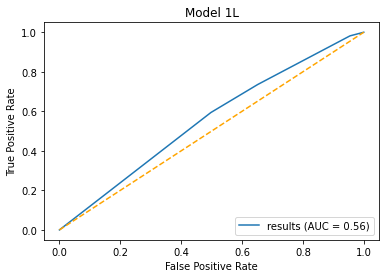

In [92]:
import matplotlib.pyplot as plt

# Import Metrics package
import sklearn.metrics as skm

# Make predictions for Model #1L
train_data['pred_1L'] = model1L.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['loan'], train_data['pred_1L'])


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score: Model1L
plot_roc(fpr,tpr, title='Model 1L')

#### 

#### Default vs Loan

In [93]:
model2L = logit(formula='loan ~ default', data=train_data).fit()

model2L.summary()

Optimization terminated successfully.
         Current function value: 0.437687
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loan   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 May 2023   Pseudo R-squ.:                0.005360
Time:                        17:01:11   Log-Likelihood:                -19788.
converged:                       True   LL-Null:                       -19895.
Covariance Type:            nonrobust   LLR p-value:                 2.674e-48
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6854      0.013   -128.984      0.000      -1.711      -1.660
default[T.yes]     1.1502      0.074     15.597      0.000       1.006       1.295
==================================================================================
"""

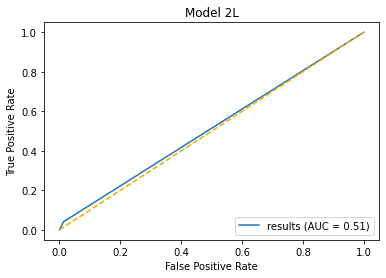

In [94]:
# Make predictions for Model #2L
train_data['pred_2L'] = model2L.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['loan'], train_data['pred_2L'])

# Display ROC Curve w/ AUC Score: Model2L
plot_roc(fpr,tpr, title='Model 2L')

#### Balance Category vs loan

In [95]:
model3L = logit(formula='loan ~ balance_cat', data=train_data).fit()

model3L.summary()

Optimization terminated successfully.
         Current function value: 0.432714
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loan   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 May 2023   Pseudo R-squ.:                 0.01666
Time:                        17:01:11   Log-Likelihood:                -19563.
converged:                       True   LL-Null:                       -19895.
Covariance Type:            nonrobust   LLR p-value:                3.537e-146
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.7478      0.035    -21.430      0.000      -0.816      -0.679
balance_cat[T.Positive]    -1.0218      0.038    -27.196      0.000      -1.095      -0.948
===========================================================================================
"""

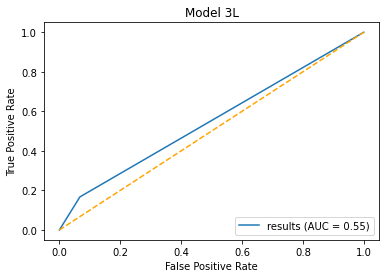

In [96]:
# Make predictions for Model #3L
train_data['pred_3L'] = model3L.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['loan'], train_data['pred_3L'])

# Display ROC Curve w/ AUC Score: Model3L
plot_roc(fpr,tpr, title='Model 3L')

#### Job Category vs Default

In [97]:
model4L = logit(formula='loan ~ job_cat', data=train_data).fit()

model4L.summary()

Optimization terminated successfully.
         Current function value: 0.435813
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loan   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45206
Method:                           MLE   Df Model:                            4
Date:                Fri, 26 May 2023   Pseudo R-squ.:                0.009618
Time:                        17:01:12   Log-Likelihood:                -19704.
converged:                       True   LL-Null:                       -19895.
Covariance Type:            nonrobust   LLR p-value:                 1.531e-81
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -1.7082      0.023    -74.456      0.000      -1.753      -1.663
job_cat[T.Blue_Collar]            0.1590      0.029      5.516      0.000       0.102       0.215
job_cat[T.Self-Employed]          0.2634      0.051      5.128      0.000       0.163       0.364
job_cat[T.Student]               -2.6377      0.291     -9.051      0.000      -3.209      -2.067
job_cat[T.Unemployed/Retired]    -0.3880      0.056     -6.872      0.000      -0.499      -0.277
=================================================================================================
"""

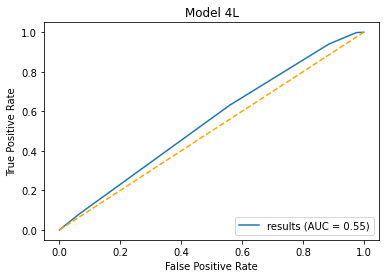

In [98]:
# Make predictions for Model #4L
train_data['pred_4L'] = model4L.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['loan'], train_data['pred_4L'])

# Display ROC Curve w/ AUC Score: Model4L
plot_roc(fpr,tpr, title='Model 4L')

In [101]:
model5L = logit(formula='loan ~ balance', data=train_data).fit()

model5L.summary()

Optimization terminated successfully.
         Current function value: 0.433880
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   loan   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 May 2023   Pseudo R-squ.:                 0.01401
Time:                        22:24:33   Log-Likelihood:                -19616.
converged:                       True   LL-Null:                       -19895.
Covariance Type:            nonrobust   LLR p-value:                3.032e-123
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4789      0.015    -99.932      0.000      -1.508      -1.450
balance       -0.0002   8.91e-06    -19.358      0.000      -0.000      -0.000
==============================================================================
"""

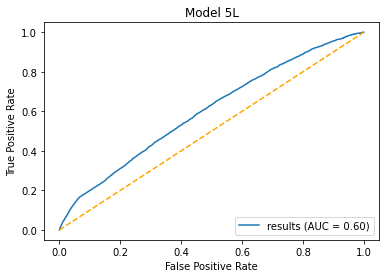

In [102]:
# Make predictions for Model #5L
train_data['pred_5L'] = model5L.predict(train_data)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(train_data['loan'], train_data['pred_5L'])

# Display ROC Curve w/ AUC Score: Model5L
plot_roc(fpr,tpr, title='Model 5L')

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, accuracy_score, classification_report, r2_score, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
 
X_train = pd.get_dummies(train_data[['marital', 'education', 'default', 'balance', 'housing', 'age_cat', 'balance_cat', 'job_cat', 'age']].copy())
X_test = pd.get_dummies(test_data[['marital', 'education', 'default', 'balance', 'housing', 'age_cat', 'balance_cat', 'job_cat', 'age']].copy())
y_train = train_data['loan']
y_test = test_data['loan']

In [123]:
ohe = OneHotEncoder()
scaler = StandardScaler()

cat_transformer = Pipeline(steps=[('ohe', OneHotEncoder())])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])                                 

cat_train_cols = X_train.select_dtypes(include=['object']).columns
cat_test_cols = X_test.select_dtypes(include=['object']).columns

num_train_cols = X_train.select_dtypes(exclude=['object']).columns
num_test_cols = X_test.select_dtypes(exclude=['object']).columns


processor = ColumnTransformer(transformers=[('cat_trans', cat_transformer, cat_train_cols), 
                                            ('num_trans', num_transformer, num_train_cols)
                                        ])

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

### Determine the best model using 10-Fold Cross Validation (Accuracy Scores)

In [153]:
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
sv = SVC(random_state=42)
nb = GaussianNB()
xgb = XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='error')

In [154]:

model_map = {lr:'Logistic Regression', rf:'Random Forest', gb:'Gradient Boost', nb:'Gausian Naive Bayes', xgb:'XGBoost'}

for index, model in enumerate(model_map):
    cv_score = cross_val_score(model, X_train_processed, y_train, cv=10)
    cv_avg = (round(cv_score.mean(), 2)) * 100
    print(model_map[model] + f" Cross Validation Score: {cv_avg}")

Logistic Regression Cross Validation Score: 84.0
Random Forest Cross Validation Score: 80.0
Gradient Boost Cross Validation Score: 84.0
Gausian Naive Bayes Cross Validation Score: 74.0
XGBoost Cross Validation Score: 84.0


### 10-Fold Cross Validation (AUC Scores)

In [155]:
for index, model in enumerate(model_map):
    cv_score = cross_val_score(model, X_train_processed, y_train, cv=10, scoring='roc_auc')
    cv_avg = (round(cv_score.mean(), 2)) * 100
    print(model_map[model] + f" Cross Validation Score: {cv_avg}")
    

Logistic Regression Cross Validation Score: 61.0
Random Forest Cross Validation Score: 65.0
Gradient Boost Cross Validation Score: 63.0
Gausian Naive Bayes Cross Validation Score: 62.0
XGBoost Cross Validation Score: 65.0


### Hyperparameter Tuning XGBoost Classifier

In [175]:
#    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
#    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of features when constructing each tree

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [500, 1000, 5000],  # Number of trees in the forest
    'learning_rate': [0.15, .175, .195],  # Learning rate
    'max_depth': [5, 7],  # Maximum depth of each tree
    'gamma': [0, 0.5]  # Minimum loss reduction required to make a further partition on a leaf node
}


# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_processed, y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

c:\Users\mmaje\anaconda3\envs\minimal_ds\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


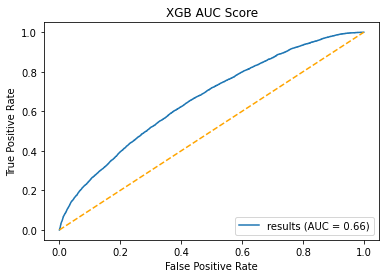

In [173]:
xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.15, max_depth=7, gamma=0, random_state=42, eval_metric='error')

y_prob = cross_val_predict(xgb_model, X_train_processed, y_train, cv=5, method='predict_proba')
y_scores = y_prob[:, 1]

xgb_fit = xgb_model.fit(X_train_processed, y_train)
y_pred = xgb_model.predict(X_test_processed)


# Make predictions for XGBoost
#test_data['pred'] = xgb_model.predict(X_test_processed)

# Generate fpr, tpr, and thresholds for ROC curve
fpr, tpr, thresholds = skm.roc_curve(y_train, y_scores)


# ROC Curve Plot Function
def plot_roc(fpr,tpr, title):
    
    # AUC score
    auc_score = skm.auc(fpr,tpr)
    
    # ROC curve
    skm.RocCurveDisplay(fpr=fpr, tpr=tpr,
                        roc_auc=auc_score,
                        estimator_name='results').plot()
    
    # Add title to ROC curve
    plt.title(title)
    
    # Add the diagonal line
    plt.plot([0, 1], [0, 1], 
             color='orange', 
             linestyle='--')

# Display ROC Curve w/ AUC Score
plot_roc(fpr,tpr, title='XGB AUC Score')

In [174]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3830
           1       0.97      0.29      0.44       691

    accuracy                           0.89      4521
   macro avg       0.93      0.64      0.69      4521
weighted avg       0.90      0.89      0.86      4521



In [161]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cat,balance_cat,job_cat,pred
0,30,unemployed,married,primary,no,1787,no,0,cellular,19,...,79,1,-1,0,unknown,no,Senior_Adult,Positive,Unemployed/Retired,0
1,33,services,married,secondary,no,4789,yes,1,cellular,11,...,220,1,339,4,failure,no,Adult,Positive,Blue_Collar,0
2,35,management,single,tertiary,no,1350,yes,0,cellular,16,...,185,1,330,1,failure,no,Adult,Positive,Administration,0
3,30,management,married,tertiary,no,1476,yes,1,unknown,3,...,199,4,-1,0,unknown,no,Adult,Positive,Administration,0
4,59,blue-collar,married,secondary,no,0,yes,0,unknown,5,...,226,1,-1,0,unknown,no,Adult,Positive,Blue_Collar,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,0,cellular,30,...,329,5,-1,0,unknown,no,Adult,Negative,Blue_Collar,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,1,unknown,9,...,153,1,-1,0,unknown,no,Adult,Negative,Self-Employed,1
4518,57,technician,married,secondary,no,295,no,0,cellular,19,...,151,11,-1,0,unknown,no,Adult,Positive,Blue_Collar,0
4519,28,blue-collar,married,secondary,no,1137,no,0,cellular,6,...,129,4,211,3,other,no,Adult,Positive,Blue_Collar,0


In [100]:
test_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'age_cat', 'balance_cat', 'job_cat'],
      dtype='object')